<a href="https://colab.research.google.com/github/vladijarosz/Cuenta-inv/blob/main/composicion_portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Descargar archivo de tenencias
!wget -O tenencias_2.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/tenencias_2.xlsx"

import pandas as pd
import re

# Leer el archivo
df = pd.read_excel("tenencias_2.xlsx")

# Completar Ticker si está vacío
def completar_ticker(nombre):
    match = re.search(r'\((\w+)\)', str(nombre))
    if not match:
        return None
    ticker = match.group(1)
    return f"{ticker}.BA" if 'CEDEAR' in str(nombre) else ticker

df['Ticker'] = df.apply(
    lambda row: completar_ticker(row['Nombre']) if pd.isna(row['Ticker']) else row['Ticker'],
    axis=1
)

# Convertir columnas a tipo numérico
df['precio'] = pd.to_numeric(df['precio'].astype(str).str.replace(',', '.'), errors='coerce')
df['Tenencia'] = pd.to_numeric(df['Tenencia'], errors='coerce')
df['total'] = pd.to_numeric(df['total'].astype(str).str.replace(',', '.'), errors='coerce')

# Convertir fecha
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Agrupar por fecha y sumar
suma_por_fecha = df.groupby('fecha', as_index=False)['total'].sum()
# =========================================================
# 1. Total del portafolio por mes
# =========================================================

total_mensual = (
    df.groupby('fecha')['total']
    .sum()
    .rename('total_portafolio')
    .reset_index()
)

# =========================================================
# 2. Merge al dataframe original
# =========================================================

df = df.merge(
    total_mensual,
    on='fecha',
    how='left'
)

# =========================================================
# 3. Calcular peso porcentual mensual
# =========================================================

df['peso_mensual'] = df['total'] / df['total_portafolio']
df['Ticker'] = df['Ticker'].fillna(df['Nombre'])



df

--2026-02-11 02:45:20--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/tenencias_2.xlsx
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/tenencias_2.xlsx [following]
--2026-02-11 02:45:20--  https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/tenencias_2.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/tenencias_2.xlsx [following]
--2026-02-11 02:45:21--  https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/tenencias_2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

,fecha,Ticker,Nombre,Tenencia,precio,moneda,total,total_portafolio,peso_mensual
0,2024-01-31,BPAT,BANCO PATAGONIA ACCIONES CL. B $ ESC. (BPAT),571.0,53.35,ARS,30460.57,6.604867e+07,4.611837e-04
1,2024-01-31,BRKB.BA,CEDEAR BERKSHIRE HATHAWAY INC. (BRKB),19.0,22489.50,ARS,427300.50,6.604867e+07,6.469479e-03
2,2024-01-31,AGRO,AGROMETAL S.A.I. ESCR. 1 VOTO (AGRO),13171.0,61.30,ARS,807382.30,6.604867e+07,1.222405e-02
3,2024-01-31,HARG,HOLCIM ESCRIT. ORD. 1 VOTO (HARG),953.0,895.00,ARS,852935.00,6.604867e+07,1.291373e-02
4,2024-01-31,XLE.BA,CEDEAR ENERGY SELECT SECTOR SPDR FUND (XLE),16.0,53500.00,ARS,856000.00,6.604867e+07,1.296014e-02
...,...,...,...,...,...,...,...,...,...
274,2024-12-31,AL30,BONO REP. ARGENTINA USD STEP UP 2030 (AL30),57390.0,88050.00,ARS,50531895.00,2.246320e+08,2.249541e-01
275,2024-12-31,COCOAUSD,FCI COCOS AHORRO CL.A U$S ESC. (COCOAUSD),4.0,1170.00,USD,5475.60,2.246320e+08,2.437587e-05
276,2024-12-31,ARS,ARS,-6100.0,1.00,ARS,-6100.00,2.246320e+08,-2.715553e-05
277,2024-12-31,EXT,EXT,5.0,1.00,EXT,5.00,2.246320e+08,2.225863e-08


In [ ]:
df['Ticker'] = df['Ticker'].replace('ARGENTINA', 'HARG')


In [ ]:
origen_pais = {
    'BPAT': 'Argentina',
    'BRKB.BA': 'EE.UU',
    'AGRO': 'Argentina',
    'HARG': 'Argentina',
    'XLE.BA': 'EE.UU',
    'MOLI': 'Argentina',
    'BMA': 'Argentina',
    'CRES': 'Argentina',
    'BHIP': 'Argentina',
    'QQQ.BA': 'EE.UU',
    'YMCQO': 'Argentina',
    'GGAL': 'Argentina',
    'BBAR': 'Argentina',
    'GOOGL.BA': 'EE.UU',
    'TXAR': 'Argentina',
    'AL29': 'Argentina',
    'META.BA': 'EE.UU',
    'AAPL.BA': 'EE.UU',
    'ALUA': 'Argentina',
    'YPFD': 'Argentina',
    'SPY.BA': 'EE.UU',
    'MELI.BA': 'EE.UU',
    'VIST.BA': 'EE.UU',
    'COCOA': 'Argentina',
    'AL30': 'Argentina',
    'SEMI': 'Argentina',
    'TGNO4': 'Argentina',
    'PAMP': 'Argentina',
    'MOLA': 'Argentina',
    'BBRA': 'Argentina',
    'EDN': 'Argentina',
    'GD30':'Argentina',
    'TSLA.BA':'EE.UU',
    'NU.BA':'Brasil',
    'WEGE3.SA':'Brasil',
    'VALE3.SA':'Brasil',
    'COCOAUSD':'Argentina',
    'GD35':'Argentina',
    'HARG': 'Argentina',
    'EWZ.BA':'Brasil'

}

sector_ticker = {
    'BPAT': 'Finanzas',
    'BRKB.BA': 'Finanzas',
    'AGRO': 'Agroindustria',
    'HARG': 'Industria',
    'XLE.BA': 'Indices',
    'MOLI': 'Agroindustria',
    'BMA': 'Finanzas',
    'CRES': 'Real Estate',
    'BHIP': 'Finanzas',
    'QQQ.BA': 'Indices',
    'YMCQO': 'ON',
    'GGAL': 'Finanzas',
    'BBAR': 'Finanzas',
    'GOOGL.BA': 'Tecnología',
    'TXAR': 'Industria',
    'AL29': 'Bonos',
    'META.BA': 'Tecnología',
    'AAPL.BA': 'Tecnología',
    'ALUA': 'Industria',
    'YPFD': 'Energía',
    'SPY.BA': 'Indices',
    'MELI.BA': 'E-commerce',
    'VIST.BA': 'Energía',
    'COCOA': 'Fondo_Inv_pesos',
    'AL30': 'Bonos',
    'SEMI': 'Agroindustria',
    'TGNO4': 'Energía',
    'PAMP': 'Energía',
    'MOLA': 'Agroindustria',
    'BBRA': 'Finanzas',
    'EDN': 'Energía',
    'GD30': 'Bonos',
    'TSLA.BA': 'Automotriz',
    'NU.BA': 'Finanza',
    'VALE3.SA': 'Minería',
    'COCOAUSD': 'Fondo_Inv_usd',
    'GD35': 'Bonos',
    'EWZ.BA': 'Indices'
}

# Agregamos la columna 'pais' mapeando por el Ticker
df['pais'] = df['Ticker'].map(origen_pais)
df['Sector'] = df['Ticker'].map(sector_ticker)
df

,fecha,Ticker,Nombre,Tenencia,precio,moneda,total,total_portafolio,peso_mensual,pais,Sector
0,2024-01-31,BPAT,BANCO PATAGONIA ACCIONES CL. B $ ESC. (BPAT),571.0,53.35,ARS,30460.57,6.604867e+07,4.611837e-04,Argentina,Finanzas
1,2024-01-31,BRKB.BA,CEDEAR BERKSHIRE HATHAWAY INC. (BRKB),19.0,22489.50,ARS,427300.50,6.604867e+07,6.469479e-03,EE.UU,Finanzas
2,2024-01-31,AGRO,AGROMETAL S.A.I. ESCR. 1 VOTO (AGRO),13171.0,61.30,ARS,807382.30,6.604867e+07,1.222405e-02,Argentina,Agroindustria
3,2024-01-31,HARG,HOLCIM ESCRIT. ORD. 1 VOTO (HARG),953.0,895.00,ARS,852935.00,6.604867e+07,1.291373e-02,Argentina,Industria
4,2024-01-31,XLE.BA,CEDEAR ENERGY SELECT SECTOR SPDR FUND (XLE),16.0,53500.00,ARS,856000.00,6.604867e+07,1.296014e-02,EE.UU,Indices
...,...,...,...,...,...,...,...,...,...,...,...
274,2024-12-31,AL30,BONO REP. ARGENTINA USD STEP UP 2030 (AL30),57390.0,88050.00,ARS,50531895.00,2.246320e+08,2.249541e-01,Argentina,Bonos
275,2024-12-31,COCOAUSD,FCI COCOS AHORRO CL.A U$S ESC. (COCOAUSD),4.0,1170.00,USD,5475.60,2.246320e+08,2.437587e-05,Argentina,Fondo_Inv_usd
276,2024-12-31,ARS,ARS,-6100.0,1.00,ARS,-6100.00,2.246320e+08,-2.715553e-05,NaN,NaN
277,2024-12-31,EXT,EXT,5.0,1.00,EXT,5.00,2.246320e+08,2.225863e-08,NaN,NaN


In [ ]:
# Asegurar tipo datetime y agregar columna de mes
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.to_period('M')  # Ej: '2024-01'

# Filtrar por pesos válidos (opcional)
df_filtrado = df[df['peso_mensual'] >= 0].copy()
df_filtrado=df[(df['fecha']<='2024-12-31') &
                (df['fecha']>'2024-01-01')]

# Agrupar por mes y sector, y sumar pesos
df_sector_mes = df_filtrado.groupby(['mes', 'Sector'])['peso_mensual'].sum().reset_index()

# Pivotear: filas = meses, columnas = sectores
tabla_sector_mes = df_sector_mes.pivot_table(
    index='mes',
    columns='Sector',
    values='peso_mensual',
    fill_value=0
)

# (Opcional) Ordenar por mes cronológicamente
tabla_sector_mes = tabla_sector_mes.sort_index()

df_filtrado

,fecha,Ticker,Nombre,Tenencia,precio,moneda,total,total_portafolio,peso_mensual,pais,Sector,mes
0,2024-01-31,BPAT,BANCO PATAGONIA ACCIONES CL. B $ ESC. (BPAT),571.0,53.35,ARS,30460.57,6.604867e+07,4.611837e-04,Argentina,Finanzas,2024-01
1,2024-01-31,BRKB.BA,CEDEAR BERKSHIRE HATHAWAY INC. (BRKB),19.0,22489.50,ARS,427300.50,6.604867e+07,6.469479e-03,EE.UU,Finanzas,2024-01
2,2024-01-31,AGRO,AGROMETAL S.A.I. ESCR. 1 VOTO (AGRO),13171.0,61.30,ARS,807382.30,6.604867e+07,1.222405e-02,Argentina,Agroindustria,2024-01
3,2024-01-31,HARG,HOLCIM ESCRIT. ORD. 1 VOTO (HARG),953.0,895.00,ARS,852935.00,6.604867e+07,1.291373e-02,Argentina,Industria,2024-01
4,2024-01-31,XLE.BA,CEDEAR ENERGY SELECT SECTOR SPDR FUND (XLE),16.0,53500.00,ARS,856000.00,6.604867e+07,1.296014e-02,EE.UU,Indices,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...
274,2024-12-31,AL30,BONO REP. ARGENTINA USD STEP UP 2030 (AL30),57390.0,88050.00,ARS,50531895.00,2.246320e+08,2.249541e-01,Argentina,Bonos,2024-12
275,2024-12-31,COCOAUSD,FCI COCOS AHORRO CL.A U$S ESC. (COCOAUSD),4.0,1170.00,USD,5475.60,2.246320e+08,2.437587e-05,Argentina,Fondo_Inv_usd,2024-12
276,2024-12-31,ARS,ARS,-6100.0,1.00,ARS,-6100.00,2.246320e+08,-2.715553e-05,NaN,NaN,2024-12
277,2024-12-31,EXT,EXT,5.0,1.00,EXT,5.00,2.246320e+08,2.225863e-08,NaN,NaN,2024-12


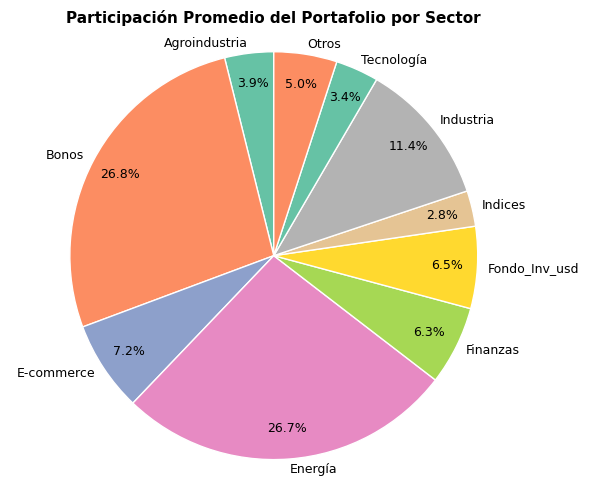

In [ ]:
import matplotlib.pyplot as plt

# Promedio del peso mensual por sector
promedio_sector = tabla_sector_mes.mean()

# Umbral (5%)
umbral = 0.02

# Sectores principales
sectores_principales = promedio_sector[promedio_sector > umbral]

# Sectores chicos → "Otros"
sectores_chicos = promedio_sector[promedio_sector <= umbral]
peso_otros = sectores_chicos.sum()

# Combinar todo
promedio_final = sectores_principales.copy()
if peso_otros > 0:
    promedio_final['Otros'] = peso_otros

# Colores elegantes
colores = plt.cm.Set2.colors[:len(promedio_final)]

# Gráfico de torta
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    promedio_final,
    labels=promedio_final.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.05
)

# Título estilo informe
plt.title(
    'Participación Promedio del Portafolio por Sector',
    fontsize=11,
    weight='bold'
)

plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
# Asegurar que la columna 'mes' existe
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.to_period('M')

# Filtrar pesos válidos
df_filtrado = df[df['peso_mensual'] >= 0].copy()

# Agrupar por mes y país, sumar pesos
df_pais_mes = df_filtrado.groupby(['mes', 'pais'])['peso_mensual'].sum().reset_index()

# Pivotear: filas = meses, columnas = países
tabla_pais_mes = df_pais_mes.pivot_table(
    index='mes',
    columns='pais',
    values='peso_mensual',
    fill_value=0
)

# Ordenar cronológicamente
tabla_pais_mes = tabla_pais_mes.sort_index()


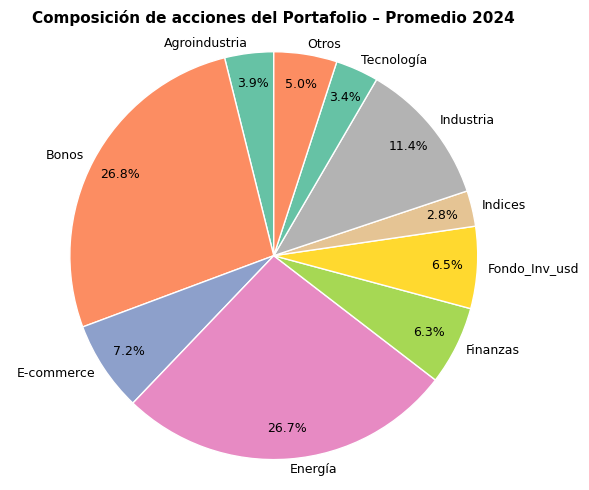

In [ ]:
import matplotlib.pyplot as plt

# Extraer la fila de enero 2024
pais = tabla_pais_mes.mean()

# Filtrar países con peso mayor a 0 (opcional)
pais = pais[pais > 0]

# Colores elegantes
colores = plt.cm.Set2.colors[:len(promedio_final)]

# Gráfico de torta
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    promedio_final,
    labels=promedio_final.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.05
)

plt.title('Composición de acciones del Portafolio – Promedio 2024', fontsize=11, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


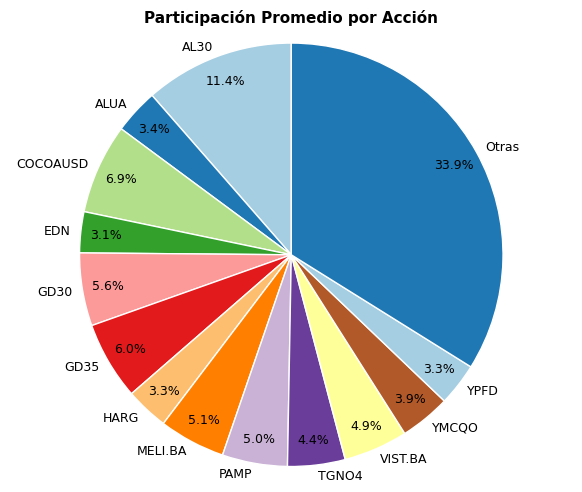

In [ ]:
import matplotlib.pyplot as plt

# Calcular promedio de peso por ticker
prom_acc = df.groupby('Ticker')['peso_mensual'].mean()

# Separar los tickers que superan el 5%
mayores_5 = prom_acc[prom_acc > 0.04]

# Agrupar el resto como "Otras"
otras = prom_acc[prom_acc <= 0.04]
peso_otras = otras.sum()

# Combinar en una sola Serie
promedio_final = mayores_5.copy()
if peso_otras > 0:
    promedio_final['Otras'] = peso_otras

# Colores elegantes adaptados
colores = plt.cm.Paired.colors[:len(promedio_final)]

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    promedio_final,
    labels=promedio_final.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.88,
    labeldistance=1.05
)

# Título del gráfico
plt.title('Participación Promedio por Acción', fontsize=11, weight='bold')
plt.axis('equal')  # Mantiene forma circular
plt.tight_layout()
plt.show()


In [ ]:
df_may = df.loc[
    (df['fecha'] <= '2024-05-31') & (df['fecha'] > '2024-04-30'),
    ['Ticker', 'peso_mensual', 'pais', 'Sector']
]
df_may

,Ticker,peso_mensual,pais,Sector
107,DÃ³lar estadounidense (),0.000000e+00,NaN,NaN
108,COCOA,0.000000e+00,Argentina,Fondo_Inv_pesos
109,EDN,7.801565e-03,Argentina,Energía
110,AAPL.BA,1.454606e-02,EE.UU,Tecnología
111,META.BA,1.664278e-02,EE.UU,Tecnología
112,AL29,2.225711e-02,Argentina,Bonos
113,MOLI,2.291015e-02,Argentina,Agroindustria
114,BHIP,2.580909e-02,Argentina,Finanzas
115,NU.BA,3.085901e-02,Brasil,Finanza
116,GGAL,3.173009e-02,Argentina,Finanzas


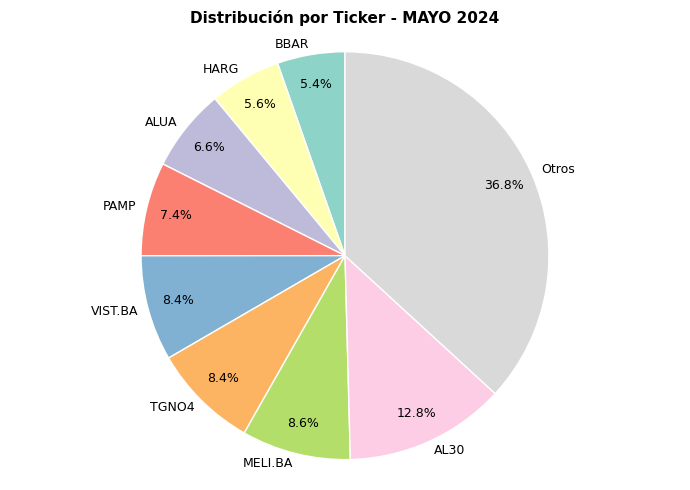

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos de diciembre
df_may = df.loc[
    (df['fecha'] <= '2024-05-31') & (df['fecha'] > '2024-04-30'),
    ['Ticker', 'peso_mensual', 'pais', 'Sector']
]

# Eliminar pesos inválidos (negativos o mayores a 1)
df_may = df_may[(df_may['peso_mensual'] <= 1) & (df_may['peso_mensual'] >= 0)]

# Agrupar tickers con peso < 0.05 como "Otros"
df_mayores = df_may[df_may['peso_mensual'] >= 0.05].copy()
df_menores = df_may[df_may['peso_mensual'] < 0.05]

peso_otros = df_menores['peso_mensual'].sum()

# Crear dataframe final para graficar
df_grafico = df_mayores.copy()
if peso_otros > 0:
    df_grafico = pd.concat([
        df_grafico,
        pd.DataFrame({'Ticker': ['Otros'], 'peso_mensual': [peso_otros]})
    ])

# Crear gráfico
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(
    df_grafico['peso_mensual'],
    labels=df_grafico['Ticker'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.05
)

plt.title('Distribución por Ticker - MAYO 2024', fontsize=11, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


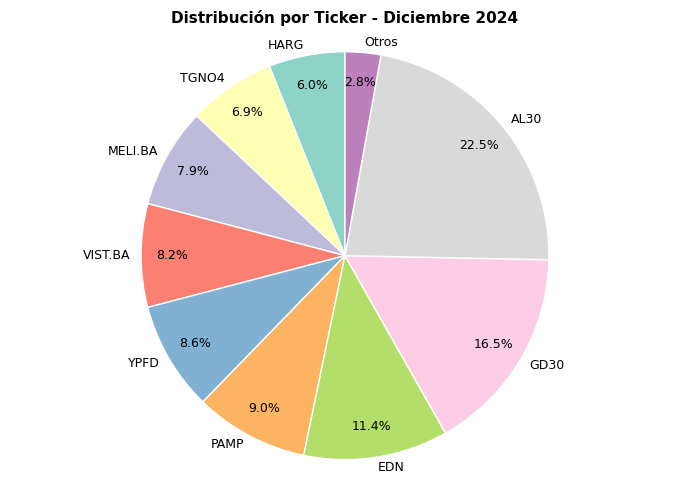

In [ ]:
import matplotlib.pyplot as plt

# Filtrar datos de diciembre
df_dic = df.loc[
    (df['fecha'] <= '2024-12-31') & (df['fecha'] > '2024-11-30'),
    ['Ticker', 'peso_mensual', 'pais', 'Sector']
]

# Eliminar pesos inválidos (negativos o mayores a 1)
df_dic = df_dic[(df_dic['peso_mensual'] <= 1) & (df_dic['peso_mensual'] >= 0)]

# Agrupar tickers con peso < 0.05 como "Otros"
df_mayores = df_dic[df_dic['peso_mensual'] >= 0.05].copy()
df_menores = df_dic[df_dic['peso_mensual'] < 0.05]

peso_otros = df_menores['peso_mensual'].sum()

# Crear dataframe final para graficar
df_grafico = df_mayores.copy()
if peso_otros > 0:
    df_grafico = pd.concat([
        df_grafico,
        pd.DataFrame({'Ticker': ['Otros'], 'peso_mensual': [peso_otros]})
    ])

# Crear gráfico
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(
    df_grafico['peso_mensual'],
    labels=df_grafico['Ticker'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.05
)

plt.title('Distribución por Ticker - Diciembre 2024', fontsize=11, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
sector_dic = tabla_sector_mes.loc['2024-12']
sector_dic

,2024-12
Sector,
Agroindustria,0.000000
Automotriz,0.000000
Bonos,0.389744
E-commerce,0.079120
Energía,0.442506
Finanza,0.000000
Finanzas,0.000000
Fondo_Inv_pesos,0.000000
Fondo_Inv_usd,0.000024


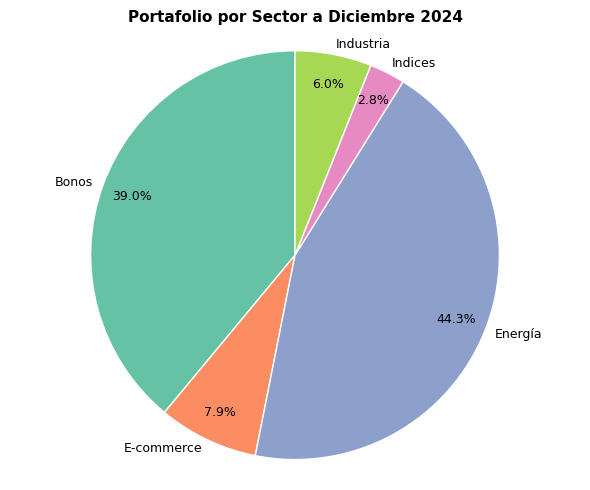

In [ ]:
import matplotlib.pyplot as plt

# Promedio del peso mensual por sector
promedio_sector = tabla_sector_mes.loc['2024-12']


# Umbral (5%)
umbral = 0.01

# Sectores principales
sectores_principales = promedio_sector[promedio_sector > umbral]

# Sectores chicos → "Otros"
sectores_chicos = promedio_sector[promedio_sector < umbral]
peso_otros = sectores_chicos.sum()

# Combinar todo
promedio_final = sectores_principales

# Colores elegantes
colores = plt.cm.Set2.colors[:len(promedio_final)]

# Gráfico de torta
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    promedio_final,
    labels=promedio_final.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.05
)

# Título estilo informe
plt.title(
    'Portafolio por Sector a Diciembre 2024',
    fontsize=11,
    weight='bold'
)

plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Asegurarse de que 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear un diccionario para guardar los DataFrames de cada mes
dfs_mensuales = {}

# Recorrer los meses del 1 al 12
for mes in range(1, 13):
    inicio = pd.Timestamp(f'2024-{mes:02d}-01')
    fin = inicio + pd.offsets.MonthEnd(1)  # Último día del mes

    df_mes = df.loc[
        (df['fecha'] >= inicio) & (df['fecha'] <= fin),
        ['Ticker', 'peso_mensual']
    ]

    # Filtrar por peso mínimo
    df_mes = df_mes[df_mes['peso_mensual'] >= 0]

    # Guardar en el diccionario con clave 'df_ene', 'df_feb', etc.
    nombre_mes = inicio.strftime('%b').lower()  # 'jan', 'feb', ...
    dfs_mensuales[f'df_{nombre_mes}'] = df_mes

# Asegurar tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear columna 'mes' con solo año y mes
df['mes'] = df['fecha'].dt.to_period('M')
df_ticker_mes = df.pivot_table(
    index='Ticker',
    columns='mes',
    values='peso_mensual',
    aggfunc='sum',   # O 'mean' si hay muchos valores por mes
    fill_value=0     # Pone 0 si no hay datos ese mes
)



In [ ]:
# Función para calcular el ENA
def calcular_ena(df_mes):
    pesos = df_mes['peso_mensual']
    if pesos.sum() == 0:
        return 0
    pesos = pesos / pesos.sum()  # Normalizamos por si no suma 1
    return 1 / (pesos ** 2).sum()

# Calcular ENA para todos los meses
ena_por_mes = {}

for clave, df_mes in dfs_mensuales.items():
    ena_por_mes[clave] = calcular_ena(df_mes)




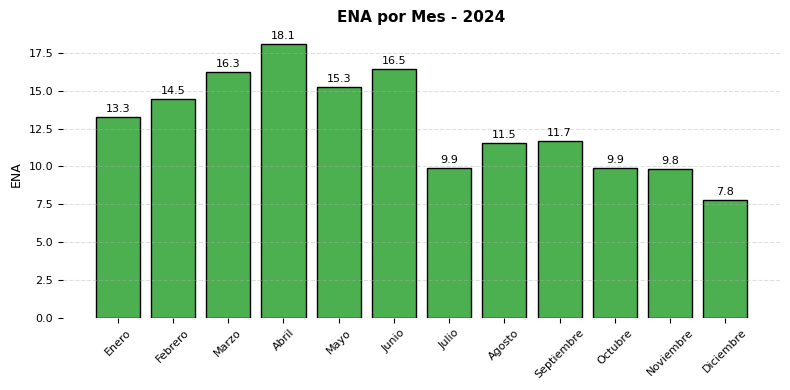

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame desde el diccionario
df_ena = pd.DataFrame(list(ena_por_mes.items()), columns=['mes_codigo', 'ENA'])

# Mapear claves como 'df_jan' a nombres de meses
nombre_meses = {
    'df_jan': 'Enero', 'df_feb': 'Febrero', 'df_mar': 'Marzo',
    'df_apr': 'Abril', 'df_may': 'Mayo', 'df_jun': 'Junio',
    'df_jul': 'Julio', 'df_aug': 'Agosto', 'df_sep': 'Septiembre',
    'df_oct': 'Octubre', 'df_nov': 'Noviembre', 'df_dec': 'Diciembre'
}

df_ena['Mes'] = df_ena['mes_codigo'].map(nombre_meses)

# Orden cronológico de meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df_ena['Mes'] = pd.Categorical(df_ena['Mes'], categories=orden_meses, ordered=True)
df_ena = df_ena.sort_values('Mes')


import matplotlib.pyplot as plt

# Estilo tipo informe y tamaño más compacto
plt.figure(figsize=(8, 4))
bars = plt.bar(df_ena['Mes'], df_ena['ENA'], color='#4CAF50', edgecolor='black')

# Etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}',
             ha='center', va='bottom', fontsize=8)

# Títulos y etiquetas
plt.title('ENA por Mes - 2024', fontsize=11, weight='bold')
plt.xlabel('')
plt.ylabel('ENA', fontsize=9)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Estilo ajustado para informes
plt.box(False)
plt.tight_layout()
plt.show()


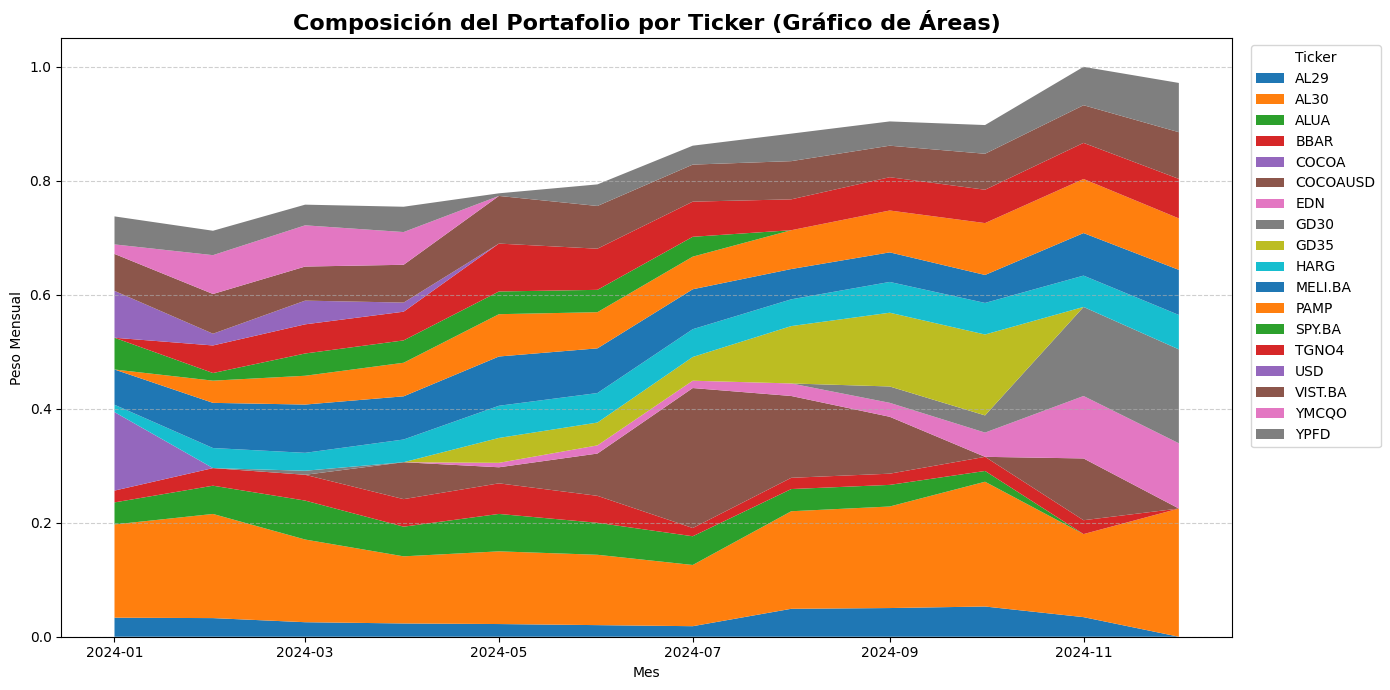

In [ ]:
# Asegurar que fecha es datetime y extraer el mes
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.to_period('M')  # Solo año y mes

# Crear tabla: Ticker vs Mes con peso_mensual
df_ticker_mes = df.pivot_table(
    index='mes',
    columns='Ticker',
    values='peso_mensual',
    aggfunc='sum',
    fill_value=0
)
import matplotlib.pyplot as plt

# Convertimos el índice 'mes' a timestamp para que matplotlib lo entienda
df_plot = df_ticker_mes.copy()
df_plot.index = df_plot.index.to_timestamp()

# Filtrar tickers más relevantes (peso >= 5% en algún mes)
tickers_top = df_plot.columns[(df_plot >= 0.05).any()]

# Filtrar el dataframe a solo esos tickers
df_plot = df_plot[tickers_top]

# Graficar área apilada
plt.figure(figsize=(14, 7))
plt.stackplot(df_plot.index, df_plot.T.values, labels=tickers_top)

plt.title('Composición del Portafolio por Ticker (Gráfico de Áreas)', fontsize=16, weight='bold')
plt.xlabel('Mes')
plt.ylabel('Peso Mensual')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), title='Ticker')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Asegurarse de que el índice sea tipo datetime
df_plot = df_ticker_mes.copy()
df_plot.index = df_plot.index.to_timestamp()

# Filtrar tickers con peso >= 5% en al menos un mes
tickers_top = df_plot.columns[(df_plot >= 0.05).any()]
df_plot = df_plot[tickers_top]

# Crear figura
fig = go.Figure()

# Colores automáticos o personalizados
for ticker in df_plot.columns:
    fig.add_trace(go.Scatter(
        x=df_plot.index,
        y=df_plot[ticker],
        mode='lines',
        stackgroup='one',
        name=ticker,
        hovertemplate='%{x|%b %Y}<br>%{y:.2%}<extra>%{fullData.name}</extra>'
    ))

# Layout
fig.update_layout(
    title='Composición del Portafolio por Ticker (Áreas Apiladas)',
    xaxis_title='Mes',
    yaxis_title='Peso Mensual',
    yaxis_tickformat='.0%',
    hovermode='x unified',
    template='plotly_white',
    legend_title='Ticker',
    height=500
)

fig.show()
